In [ ]:
HOC - Higher Order Component: Component Bậc cao
- Tái sự dụng Logic bằng cách tạo một component bậc cao hơn
- Component đó là một component ôm một component

In [ ]:
- Với customHook sẽ đặt tên bằng `use...`
- Với RenderProps thì đặt tên giống Component bình thường
- Với HOC => bắt đầu bằng `with`

=> Component bậc cao -> sẽ bọc bên ngoài Component của chúng ta

- Có thể chúng ta đã bắt gặp: `react.memo`, `forwardRef`
=> Chính là HOC

In [ ]:
// Kỳ vọng

/* 3. HOC */
function withCounter() {
    //....
}

/* Arrow Function */
const RenderProps = withCounter(({count, handleIncrease}) => {
    return (
        <div>
            <Counter initialState={10}>
                {(handleIncrease, count) => (
                    <h1 onClick={handleIncrease}>Count is {count}</h1>
                )}
            </Counter>
        </div>
    );
})

export default RenderProps;

/* Nếu để nguyên code thế này 
    - hàm withCounter sẽ return về undefined
    - Khi đó RenderProps sẽ là undefined
    => tại Router sẽ render ra element <RenderProps>
    => Tương đương với React.createElement(RenderProps) = React.createElement(undefined) => lỗi

React.createElement(RenderProps):
- Tham số thứ nhất của React.createElement(params) có thể nhận "string" hoặc "function" (chính là function Component)

=> Tức là kỳ vọng của chúng ta RenderProps phải là một function component
=> tại withCounter, chúng ta return ra một hàm
*/



In [ ]:
/* Giải thích cho việc React.createElement() có nhận tham số đầu tiên là một function */

// Định nghĩa một Component (Function)
function Welcome(props) {
  return React.createElement('h1', null, `Xin chào, ${props.name}`);
}

// Sử dụng Component đó làm tham số đầu tiên
// React sẽ gọi hàm Welcome và truyền { name: "Bạn" } vào props
const element = React.createElement(Welcome, { name: 'Bạn' });

/* 
Cơ chế Props (Dữ liệu đầu vào)
Khi bạn truyền một hàm vào createElement, React không vẽ ngay lập tức. Nó sẽ:
- Lấy object ở tham số thứ 2 (props).
- Gọi hàm của bạn và truyền object đó vào làm tham số (ví dụ: Welcome(props)).
- Lấy kết quả trả về (thường là các createElement khác) để tiếp tục xử lý.
*/

In [ ]:
import React, { useState } from "react";

/* 3. HOC */
function withCounter(Callback, initialState) {
    /* hàm được trả ra chính là Higher Order Component */
    const Counter = () => {
        // Vì là function Component nên dùng được hook
        const [count, setCount] = useState(initialState);
        const handleIncrease = () => setCount(count + 1);
        // Khi trả ra element sẽ gọi hàm Callback
        // hàm Callback ở đây là một Component
        // Truyền props
        return <Callback count={count} handleIncrease={handleIncrease} />;
    };

    /* Trả ra một component được "ĐỘ" */
    return Counter;
}

/* Nhận vào một component thô */
const RenderProps = withCounter(({ count, handleIncrease }) => {
    return (
        <div>
            <h1 onClick={handleIncrease}>Count is {count}</h1>
        </div>
    );
}, 10);

/* 
Hãy tưởng tượng HOC giống như bộ giáp Iron Man. Tony Stark là Component, bộ giáp là HOC. Khi Tony chui vào bộ giáp, anh ta vẫn là Tony, nhưng có thêm khả năng bay và bắn tia laser.
*/




export default RenderProps;


In [ ]:
# Nỗi đau: Copy-Paste Logic lặp đi lặp lại (Cross-Cutting Concerns)
- Hãy tưởng tượng bạn đang làm một trang Dashboard Admin. Bạn có 3 trang con:
  1. Dashboard
  2. Settings
  3. Profile

  Yêu cầu : "Tất cả các trang này đều phải kiểm tra xem user đã đăng nhập chưa (`isAuth`). Nếu chưa thì đá về trang Login. Nếu rồi thì mới hiện nội dung."

In [ ]:
/* Cách làm thủ công
- Bạn vào từng component và viết đoạn code if/else y hệt nhau.
 */

// Dashboard.js
const Dashboard = (props) => {
  const user = getUser();
  if (!user) return <Login />; // Logic lặp lại
  return <div>Nội dung Dashboard...</div>;
};

// Settings.js
const Settings = (props) => {
  const user = getUser();
  if (!user) return <Login />; // Logic lặp lại lần 2
  return <div>Nội dung Settings...</div>;
};

/* Nỗi đau:
- Bạn vi phạm nguyên tắc DRY (Don't Repeat Yourself).
- Nếu sếp bảo: "Thêm logic check quyền Admin nữa", bạn phải đi sửa 100 file.
- Logic bảo vệ (Auth) bị trộn lẫn với logic hiển thị (UI).
 */

In [ ]:
# HOC
Tư duy cốt lõi: Thay vì sửa code bên trong Component, ta tạo ra một hàm bao bọc (Wrapper Function). Hàm này nhận vào một Component "trần trụi" và trả ra một Component "đã được trang bị tận răng".

In [ ]:
// withAuth.js (Đây là cái khuôn đúc)
import React from 'react';

// Hàm nhận vào một Component (WrappedComponent)
const withAuth = (WrappedComponent) => {
  // Trả về một Component mới
  return (props) => {
    const user = localStorage.getItem('user'); // Giả lập check user

    // Logic chung nằm ở đây
    if (!user) {
      return <p>Vui lòng đăng nhập!</p>;
    }

    // Nếu thoả mãn, render component gốc và truyền lại toàn bộ props
    return <WrappedComponent {...props} user={user} />;
  };
};

export default withAuth;

In [ ]:
/* 
Cách dùng

*/

// Dashboard.js (Component ngây thơ, không biết gì về auth)
const Dashboard = ({ user }) => {
  return <h1>Chào mừng, {user.name}</h1>;
};

// "Độ" component trước khi xuất xưởng
const ProtectedDashboard = withAuth(Dashboard);

export default ProtectedDashboard;

In [ ]:
# Tóm tắt "Nỗi đau" của HOC
- Nỗi đau: Tôi có 10 component cần cùng một tính năng (Auth, Loading, Error Handling) bao trùm lên toàn bộ component đó.

- Thuốc giải: Viết một hàm HOC, bọc 10 component đó lại. Logic nằm ở vỏ bọc, component ruột vẫn sạch sẽ.

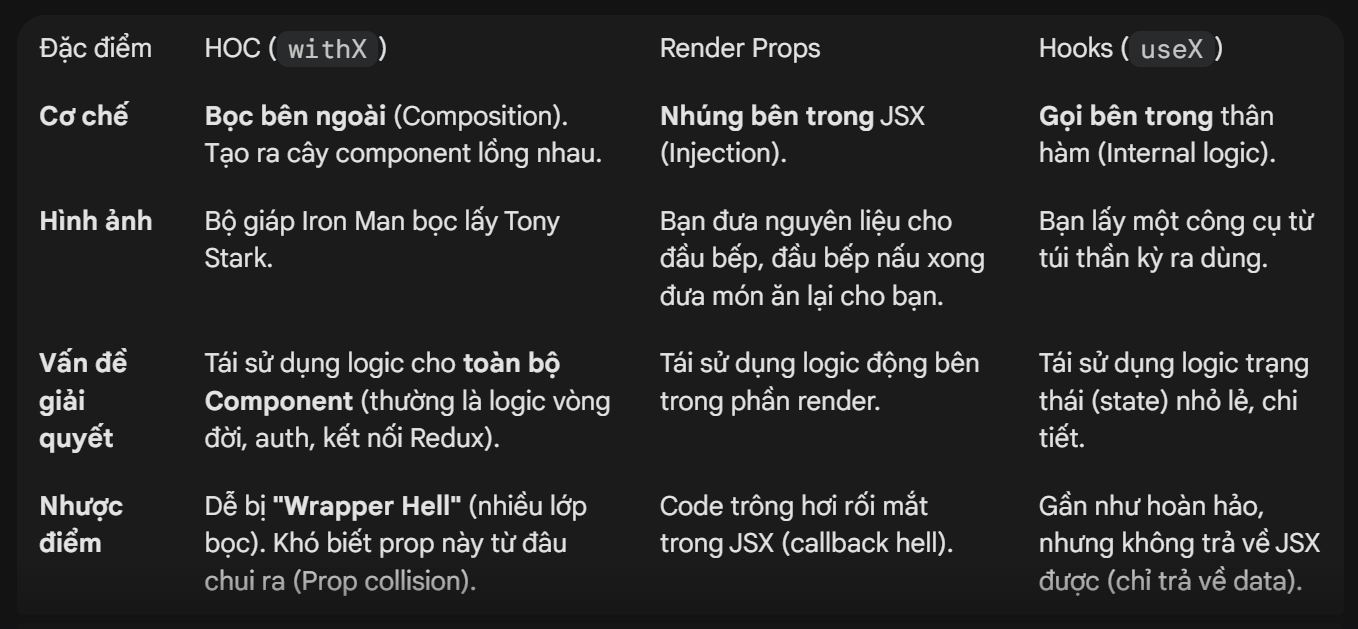

In [ ]:
import React, { useState } from "react";

function withCounter(CallbackComponent, initialState) {
    const Counter = () => {
        /* 2. Render Props */
    CallbackComponent = Counter.displayName
        const [count, setCount] = useState(initialState);
        const handleIncrease = () => setCount(count + 1);
        return <CallbackComponent count={count} handleIncrease={handleIncrease} />;


    };

    return Counter;
}

const RenderProps = withCounter(({ count, handleIncrease }) => {
    return (
        <div>
            <h1 onClick={handleIncrease}>Count is {count}</h1>
        </div>
    );
}, 10);

/* 1. Debugs */
RenderProps.displayName = "RenderProps"



export default RenderProps;


In [ ]:
/* 
TOM LAI:
- Custom Hook: 
    ✅ Ngắn gọn, phổ biến, tái sử dụng logic
    ❌ Không tái sử dụng Layout, JSX
- RenderProps:
    ✅ Tái sử dụng được cả logic, layout
    ❌ Triển khai sử dụng khó hiểu
- HOC:
    ✅ Tái sử dụng được cả logic, layout, dễ dùng
    ❌ Triển khai cực lú
    ❌ Không phù hợp truyền state bên ngoài vào

Mặc dù Custom Hook được sử dụng rộng rãi, nhưng vẫn tồn tại 2 cách còn lại vì có một vài thư viện vẫn còn hướng dẫn sử dụng bằng 2 cách đó
*/